In [2]:
## Include mxnet path: you should include your mxnet local path, if mxnet path is global, 
## you don't need to include it.
import sys
sys.path.append('../../practice_demo')

import os
import mxnet as mx
import numpy as np
import copy
import re
from google.protobuf import text_format
import json
import cv2 as cv
import scipy
import PIL.Image
import math
import time
import scipy
import matplotlib
%matplotlib inline
import pylab as plt
from scipy.ndimage.filters import gaussian_filter
from generateLabelCPMWeight import *

from collections import namedtuple
Point = namedtuple('Point', 'x y')
crop_size_x = 368
crop_size_y = 368
center_perterb_max = 40

#use_caffe = True
scale_prob = 1
scale_min = 0.5
scale_max = 1.1
target_dist = 0.6


## Load keypoint data

In [3]:
with open('pose_io/data.json', 'r') as f:
    datas = json.load(f)
keyss = datas.keys()

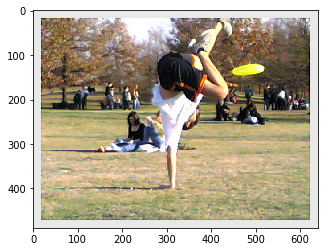

In [6]:
# read data
imgsequence = 50 ## image number
cimage = cv.imread(datas[keyss[imgsequence]]['img_paths'])
plt.imshow(cimage[:, :, [2, 1, 0]])

In [7]:
# image shape
cimage.shape

(489, 640, 3)

In [8]:
## object position

In [9]:
datas[keyss[imgsequence]]['objpos']

[197.415, 272.22]

## Generate heatmap, pagmap and mask

In [10]:
image, mask, heatmap, pagmap = getImageandLabel(datas[keyss[imgsequence]])

full mask


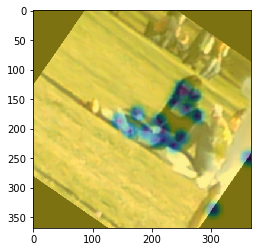

In [12]:
# part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, 
#             Lank, Leye, Reye, Lear, Rear, pt19]
heatmapScale = cv.resize(heatmap[18], (0, 0), fx=8, fy=8)

f = plt.figure(1)
plt.imshow(image[:,:,[2,1,0]])
ax2 = plt.imshow(heatmapScale, alpha=.5)
f.show()

## Show mask

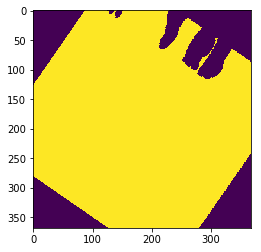

In [13]:
f = plt.figure(1)
#plt.imshow(image[:,:,[2,1,0]])
plt.imshow(mask[:,:,0])
f.show()